In [40]:
import pandas as pd
from pathlib import Path

DATASETS_PATH = Path().resolve() / 'datasets'
DATASETS_PATH

PosixPath('/Users/julio/Documents/Desarrollo/Developer/DataScience/PORTAFOLIO/planillas-gobierno-central/datasets')

In [41]:
DATASETS_PATH.parent

PosixPath('/Users/julio/Documents/Desarrollo/Developer/DataScience/PORTAFOLIO/planillas-gobierno-central')

In [42]:
from pathlib import Path

# Set the directory path where your Excel files are located
directory_path = Path("/your/directory/path/here")

# Define the common string to be replaced
old_string = 'InformeConsultaPlanilla_25102023_'

# Iterate through files in the directory
for file_path in DATASETS_PATH.iterdir():
    if file_path.is_file() and file_path.suffix == '.xlsx':  # Check if it's an Excel file
        # Replace the common string in the filename
        new_filename = file_path.name.replace(old_string, '')
        
        # Create the new file path with the updated filename
        new_file_path = file_path.parent / new_filename
        
        # Rename the file with the updated filename
        file_path.rename(new_file_path)


In [43]:
for file_path in DATASETS_PATH.iterdir():
    print(file_path)

/Users/julio/Documents/Desarrollo/Developer/DataScience/PORTAFOLIO/planillas-gobierno-central/datasets/MINISTERIO_DE_AMBIENTE.xlsx
/Users/julio/Documents/Desarrollo/Developer/DataScience/PORTAFOLIO/planillas-gobierno-central/datasets/MINISTERIO_DE_ECONOMIA_Y_FINANZAS.xlsx
/Users/julio/Documents/Desarrollo/Developer/DataScience/PORTAFOLIO/planillas-gobierno-central/datasets/.DS_Store
/Users/julio/Documents/Desarrollo/Developer/DataScience/PORTAFOLIO/planillas-gobierno-central/datasets/MINISTERIO_DE_VIVIENDA_Y_ORDENAMIENTO_TERRITORIAL.xlsx
/Users/julio/Documents/Desarrollo/Developer/DataScience/PORTAFOLIO/planillas-gobierno-central/datasets/TRIBUNAL_DE_CUENTAS.xlsx
/Users/julio/Documents/Desarrollo/Developer/DataScience/PORTAFOLIO/planillas-gobierno-central/datasets/MINISTERIO_DE_DESARROLLO_SOCIAL.xlsx
/Users/julio/Documents/Desarrollo/Developer/DataScience/PORTAFOLIO/planillas-gobierno-central/datasets/ASAMBLEA_NACIONAL.xlsx
/Users/julio/Documents/Desarrollo/Developer/DataScience/PORTAF

In [44]:
from pathlib import Path
import pandas as pd

# Define the common string to be replaced
old_string = 'InformeConsultaPlanilla_25102023_'

# Create an empty list to store dataframes from each file
dataframes_list = []

# Iterate through files in the directory
for file_path in DATASETS_PATH.iterdir():
    if file_path.is_file() and file_path.suffix == '.xlsx':  # Check if it's an Excel file
        # Replace the common string in the filename
        new_filename = file_path.name.replace(old_string, '')

        # Create the new file path with the updated filename
        new_file_path = file_path.parent / new_filename

        # Rename the file with the updated filename
        file_path.rename(new_file_path)

        # Read the Excel file into a DataFrame
        df = pd.read_excel(new_file_path, skiprows=4)

        # Create a 'SOURCE' column with the name of the file for each row
        df['SOURCE'] = new_filename

        # Append the dataframe to the list
        dataframes_list.append(df)

# Concatenate all dataframes
GOBIERNO_CENTRAL = pd.concat(dataframes_list, ignore_index=True)



<Axes: ylabel='SOURCE'>

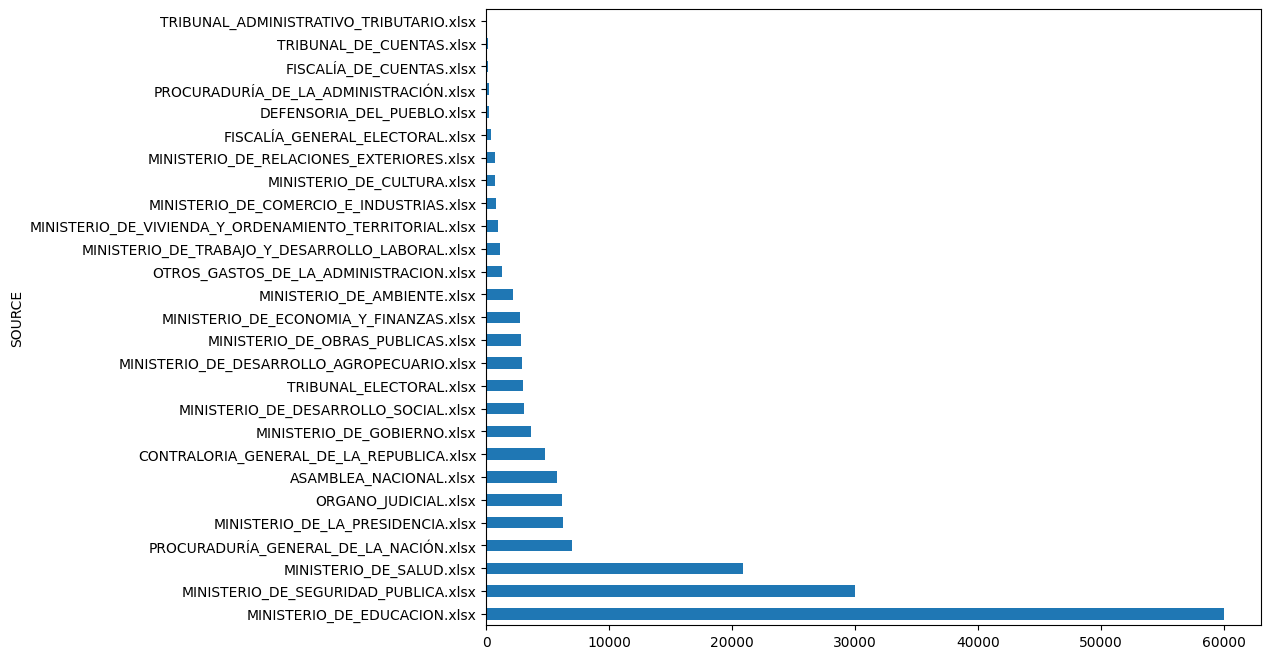

In [45]:
GOBIERNO_CENTRAL['SOURCE'].value_counts().plot.barh(figsize=(10,8))

In [46]:
planilla_mensual_gob_central = GOBIERNO_CENTRAL['Salario'].sum()
print(f'${planilla_mensual_gob_central:,.2f}')

$257,827,561.71


In [47]:
cedulas_repetidas = GOBIERNO_CENTRAL['Cédula'].value_counts().copy()
cedulas_repetidas = pd.DataFrame(cedulas_repetidas)
cedulas_repetidas['cedula'] = cedulas_repetidas.index
cedulas_repetidas.reset_index(inplace=True, drop=True)
cedulas_repetidas = cedulas_repetidas.query('count >= 2')
print(len(cedulas_repetidas))
cedulas_repetidas


252


count          cedula
0        2   6-0080-000173
1        2   9-0101-000098
2        2   8-0765-000321
3        2   4-0125-002566
4        2   3-0725-001591
..     ...             ...
247      2   8-0308-000305
248      2   4-0112-000452
249      2  10-0019-000511
250      2   4-0123-000935
251      2   2-0702-001207

[252 rows x 2 columns]

In [48]:
union = GOBIERNO_CENTRAL.merge(cedulas_repetidas, left_on="Cédula", right_on='cedula')
union.to_excel('./resultados/cedulas_repetidas.xlsx')
union

Nombre  Apellido         Cédula  \
0    FERNANDO   JOHNSON  3-0081-002521   
1    FERNANDO   JOHNSON  3-0081-002521   
2       IBETH  DE CHIRU  2-0087-001234   
3       IBETH  DE CHIRU  2-0087-001234   
4        JOSE     PRADO  7-0121-000221   
..        ...       ...            ...   
499    SHAMIA     REYES  8-0481-000994   
500    SHERLY    RAMSEY  8-0413-000976   
501    SHERLY    RAMSEY  8-0413-000976   
502     SIMON    MARTES  8-0735-001578   
503     SIMON    MARTES  8-0735-001578   

                                                 Cargo  Salario  Gasto  \
0                                          INSPECTOR I   600.00      0   
1                       REPRESENTANTE DE CORREGIMIENTO  2000.00      0   
2                           INGENIERO FORESTAL III (1)  3367.00      0   
3                       REPRESENTANTE DE CORREGIMIENTO  2000.00      0   
4                                      ADMINISTRADOR I   700.00      0   
..                                                 ...      ...    ...   
499  EDUCADOR N 22 (PROFESOR EDUC. SEC. 1RA. CAT. T...  1791.10      0   
500  EDUCADOR N 22 (PROFESOR EDUC. SEC. 1RA. CAT. T...  1860.14      0   
501                                   PROMOTOR COMUNAL   371.00      0   
502  EDUCADOR B 1 (MAESTRO CON TIT. DE MAESTRO DE E...  1671.52      0   
503  EDUCADOR M 1 (PROFESOR EDUC. SEC. 2DA. CAT. TI...   284.00      0   

                        Estado Fecha de inicio  \
0                   PERMANENTE      03/01/2005   
1                   PERMANENTE      02/07/2019   
2                   PERMANENTE      03/07/2006   
3                   PERMANENTE      03/07/2019   
4                   PERMANENTE      01/09/2011   
..                         ...             ...   
499                 PERMANENTE      01/05/2022   
500                 PERMANENTE      23/02/2015   
501                   EVENTUAL      08/03/2023   
502     PERIODO PROB. DE 1 AÑO      11/03/2011   
503  INTERINO HASTA FIN DE AÑO      01/06/2023   

                                     SOURCE  count         cedula  
0               MINISTERIO_DE_AMBIENTE.xlsx      2  3-0081-002521  
1    OTROS_GASTOS_DE_LA_ADMINISTRACION.xlsx      2  3-0081-002521  
2               MINISTERIO_DE_AMBIENTE.xlsx      2  2-0087-001234  
3    OTROS_GASTOS_DE_LA_ADMINISTRACION.xlsx      2  2-0087-001234  
4               MINISTERIO_DE_AMBIENTE.xlsx      2  7-0121-000221  
..                                      ...    ...            ...  
499            MINISTERIO_DE_EDUCACION.xlsx      2  8-0481-000994  
500            MINISTERIO_DE_EDUCACION.xlsx      2  8-0413-000976  
501            MINISTERIO_DE_EDUCACION.xlsx      2  8-0413-000976  
502            MINISTERIO_DE_EDUCACION.xlsx      2  8-0735-001578  
503            MINISTERIO_DE_EDUCACION.xlsx      2  8-0735-001578  

[504 rows x 11 columns]

In [49]:
duplicados_salario = union['Salario'].sum()
print(f'Duplicados salario Mensual: ${duplicados_salario:,.2f}')
print(f'Duplicados salario Anual: ${duplicados_salario*12:,.2f}')

Duplicados salario Mensual: $636,832.57
Duplicados salario Anual: $7,641,990.84


In [50]:
GOBIERNO_CENTRAL.query('Cédula == "2-0087-001234"')

Nombre  Apellido         Cédula                           Cargo  \
922    IBETH  DE CHIRU  2-0087-001234      INGENIERO FORESTAL III (1)   
64965  IBETH  DE CHIRU  2-0087-001234  REPRESENTANTE DE CORREGIMIENTO   

       Salario  Gasto      Estado Fecha de inicio  \
922     3367.0      0  PERMANENTE      03/07/2006   
64965   2000.0      0  PERMANENTE      03/07/2019   

                                       SOURCE  
922               MINISTERIO_DE_AMBIENTE.xlsx  
64965  OTROS_GASTOS_DE_LA_ADMINISTRACION.xlsx

In [51]:
GOBIERNO_CENTRAL.query('Cargo == "MINISTRO"')['Cédula'].value_counts()

Cédula
9-0098-000606    1
3-0062-000630    1
8-0220-002391    1
8-0482-000734    1
8-0797-001044    1
8-0479-000874    1
8-0298-000805    1
8-0313-000601    1
2-0082-000025    1
8-0289-000574    1
8-0223-002096    1
5-0016-002669    1
9-0165-000909    1
8-0777-001371    1
8-0721-002041    1
8-0759-001614    1
Name: count, dtype: int64

In [52]:
GOBIERNO_CENTRAL.query('Cargo == "VICEMINISTRO"')

Nombre    Apellido          Cédula         Cargo  Salario  \
488                  DIANA      LAGUNA   8-0238-000348  VICEMINISTRO  3000.00   
2568        CARLOS EDUARDO    GONZALEZ   4-0112-000145  VICEMINISTRO  3000.00   
3470                 JORGE    ALMENGOR   8-0768-000173  VICEMINISTRO  3000.00   
5123               DANIELA    MARTINEZ   1-0733-001909  VICEMINISTRO  3000.00   
5430         JOSE AGRIPINO     BATISTA   8-0166-000331  VICEMINISTRO  3000.00   
8199    MILAGROS GUADALUPE       RAMOS   6-0712-000230  VICEMINISTRO  3000.00   
16479               ISMAEL        JAEN   1-0042-000703  VICEMINISTRO  3000.00   
16878                JUANA       LOPEZ   5-0013-001657  VICEMINISTRO  3000.00   
18926             FERNANDO  CASTILLERO   8-0390-000917  VICEMINISTRO  3000.00   
20563               CARLOS      GARCIA   8-0414-000771  VICEMINISTRO  3000.00   
26474              GABRIEL    GONZALEZ   8-0717-002371  VICEMINISTRO  3000.00   
40376               ALEXIS      PINEDA   1-0040-000564  VICEMINISTRO  3000.00   
45086           ANGELICA M     ARROCHA   2-0126-000066  VICEMINISTRO  1640.00   
48301               DINORA    VISUETTI   2-0079-001881  VICEMINISTRO  2225.00   
52545        IVETTE ODALYS      BERRIO   8-0223-001693  VICEMINISTRO  3000.00   
76657                ARIEL   RODRIGUEZ   9-0708-002193  VICEMINISTRO  3217.14   
125814             RICARDO     SANCHEZ   8-0252-000598  VICEMINISTRO  3000.00   
127014                ROSA   ARGUELLES   8-0342-000333  VICEMINISTRO  3000.00   
145109                IVOR       PITTI   8-0241-000105  VICEMINISTRO  3000.00   
161370     VLADIMIR ADOLFO      FRANCO  PE-0006-000085  VICEMINISTRO  3000.00   
161402     YILL DEL CARMEN       OTERO   8-0415-000715  VICEMINISTRO  3000.00   
163127      LIBRADA JISELL    DE FRIAS   7-0703-000070  VICEMINISTRO  3000.00   
167913              OMAR E    MONTILLA   8-0449-000853  VICEMINISTRO  3000.00   

        Gasto      Estado Fecha de inicio  \
488      3000  PERMANENTE      16/02/2022   
2568     3000  PERMANENTE      05/09/2023   
3470     3000  PERMANENTE      01/07/2019   
5123     3000  PERMANENTE      15/07/2020   
5430     3000  PERMANENTE      01/07/2019   
8199     3000  PERMANENTE      01/07/2019   
16479    3000  PERMANENTE      28/02/2023   
16878    3000  PERMANENTE      01/07/2019   
18926    3000  PERMANENTE      12/10/2022   
20563    3000  PERMANENTE      28/04/2020   
26474    3000  PERMANENTE      02/07/2019   
40376    3000  PERMANENTE      13/10/2022   
45086       0  PERMANENTE      28/08/1996   
48301       0  PERMANENTE      16/05/1977   
52545    3000  PERMANENTE      01/07/2020   
76657    3000  PERMANENTE      17/08/2022   
125814   3000  PERMANENTE      01/07/2019   
127014   3000  PERMANENTE      25/07/2023   
145109   3000  PERMANENTE      01/07/2019   
161370   3000  PERMANENTE      22/11/2022   
161402   3000  PERMANENTE      22/11/2022   
163127   3000  PERMANENTE      01/07/2019   
167913   3000  PERMANENTE      01/07/2019   

                                                   SOURCE  
488                           MINISTERIO_DE_AMBIENTE.xlsx  
2568               MINISTERIO_DE_ECONOMIA_Y_FINANZAS.xlsx  
3470               MINISTERIO_DE_ECONOMIA_Y_FINANZAS.xlsx  
5123    MINISTERIO_DE_VIVIENDA_Y_ORDENAMIENTO_TERRITOR...  
5430    MINISTERIO_DE_VIVIENDA_Y_ORDENAMIENTO_TERRITOR...  
8199                 MINISTERIO_DE_DESARROLLO_SOCIAL.xlsx  
16479                         MINISTERIO_DE_GOBIERNO.xlsx  
16878                         MINISTERIO_DE_GOBIERNO.xlsx  
18926     MINISTERIO_DE_TRABAJO_Y_DESARROLLO_LABORAL.xlsx  
20563                   MINISTERIO_DE_LA_PRESIDENCIA.xlsx  
26474                          MINISTERIO_DE_CULTURA.xlsx  
40376          MINISTERIO_DE_DESARROLLO_AGROPECUARIO.xlsx  
45086                            MINISTERIO_DE_SALUD.xlsx  
48301                            MINISTERIO_DE_SALUD.xlsx  
52545                            MINISTERIO_DE_SALUD.xlsx  
76657                        MINIS